In [1]:
import sys
sys.path.insert(1, '../')
from heterogenous_game_theory import *
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
%matplotlib inline
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
plt.style.use('fivethirtyeight')
seed = 8
np.random.seed(seed)

AGENT PARAMETERS IN POPULATION
-------------------------------------
   M 		  E 		  I
-------------------------------------
| 2960 		 0.1 		 0.1 |
| 405 		 0.1 		 0.1 |
| 2618 		 0.1 		 0.1 |
| 2238 		 0.1 		 0.1 |
| 2384 		 0.1 		 0.1 |
| 3598 		 0.1 		 0.1 |
| 1244 		 0.1 		 0.1 |
| 3616 		 0.1 		 0.1 |
| 909 		 0.1 		 0.1 |
| 4922 		 0.1 		 0.1 |
| 3692 		 0.1 		 0.1 |
| 1984 		 0.1 		 0.1 |
| 24 		 0.1 		 0.1 |
| 2455 		 0.1 		 0.1 |
| 1685 		 0.1 		 0.1 |
| 2319 		 0.1 		 0.1 |
| 3429 		 0.1 		 0.1 |
| 599 		 0.1 		 0.1 |
| 792 		 0.1 		 0.1 |
-------------------------------------
The s.d. of M is: 1464.0
The s.d. of E is: 0.0
The s.d. of I is: 0.0
-------------------------------------
The mean of M is: 2047
The mean of E is: 0.1
The mean of I is: 0.1
-------------------------------------


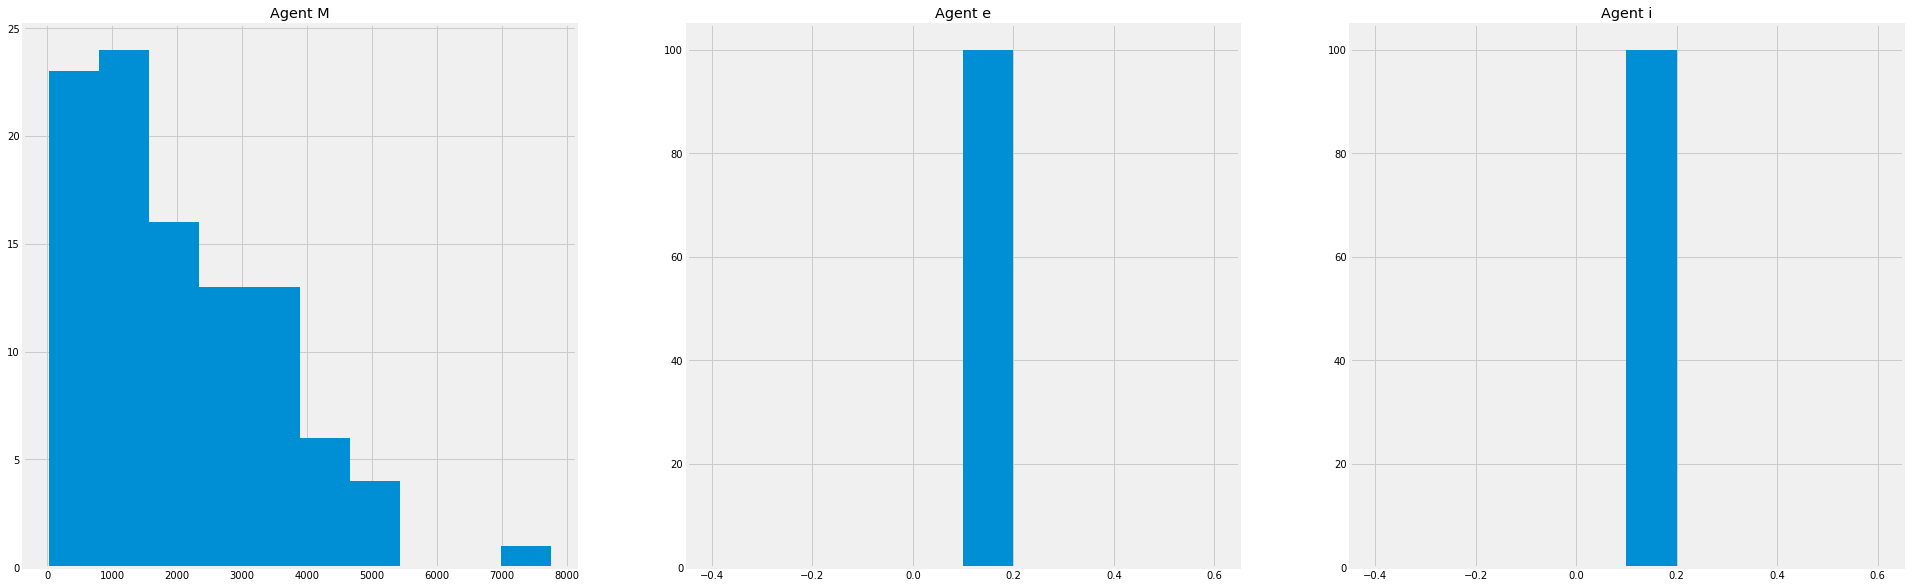

____________________________________________________________________________________________________
Agent 0 playing Agent 1: Reward: 36.0, Temptation: 40.0, Sucker: -4.0, Punishment: 0
Agent 1 playing Agent 0: Reward: 266.0, Temptation: 296.0, Sucker: -30.0, Punishment: 0
____________________________________________________________________________________________________
____________________________________________________________________________________________________
Agent 0 playing Agent 2: Reward: 236.0, Temptation: 262.0, Sucker: -26.0, Punishment: 0
Agent 2 playing Agent 0: Reward: 266.0, Temptation: 296.0, Sucker: -30.0, Punishment: 0
____________________________________________________________________________________________________
____________________________________________________________________________________________________
Agent 0 playing Agent 3: Reward: 201.0, Temptation: 224.0, Sucker: -22.0, Punishment: 0
Agent 3 playing Agent 0: Reward: 266.0, Temptation: 296.0,

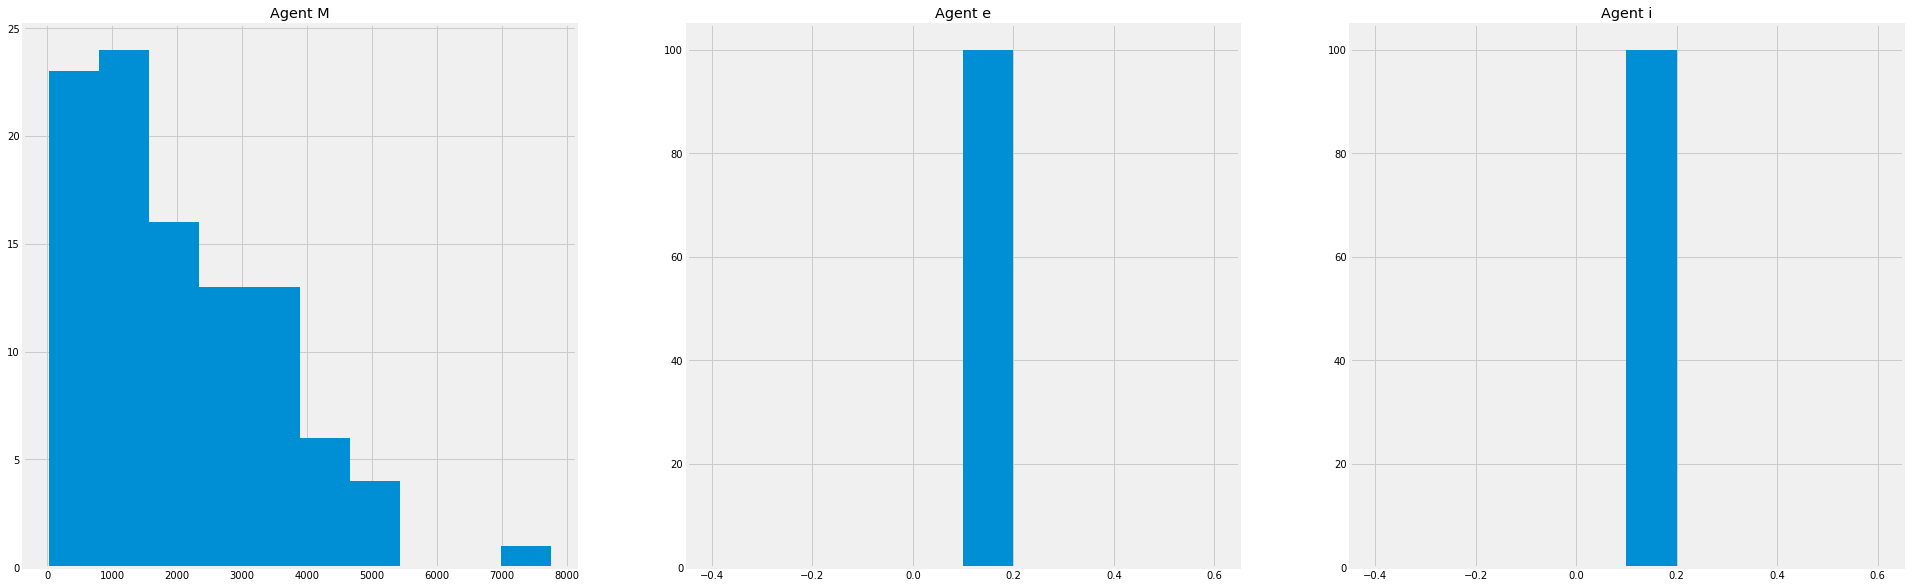

In [2]:
# if we want to run simulations with heterogenous populations - we need to set homogeneous to false, 
# and we have the option to set a value for M, E, and I for heterogenous populations (defaults are 1000, 0.1, 0.1 for homogenous)

# first number is median, second standard deviation
M = [1000, 2000]
E = [0.1, 0.00001]
I = [0.1, 0.00001]

# create a list of agents, default = 100
agents = get_agents(homogenous = False, number_of_agents = 100, M = M, E = E, I = I)
check_parameters(agents)
compare_payoff_function(agents, default_payoff_functions)
check_parameters(agents) #correct result because homogenous = True

Tournament has started...
Tournament has ended. The simulation took 34 minutes.
    S.D.  Counts Seed
0    0.5     271    8
1    0.6     255    8
2    0.7     254    8
3    0.8     229    8
4    0.9     228    8
5    1.0     196    8
6    1.1     154    8
7    1.2     130    8
8    1.3     112    8
9    1.4      93    8
10   1.5      89    8
11   1.6      73    8
12   1.7      72    8
13   1.8      57    8
14   1.9      45    8
15   2.0      36    8
16   2.1      42    8
17   2.2      27    8
18   2.3      15    8
19   2.4      10    8
20   2.5       5    8
21   2.6       1    8
22   2.7       0    8
23   2.8       0    8
24   2.9       0    8
25   3.0       0    8


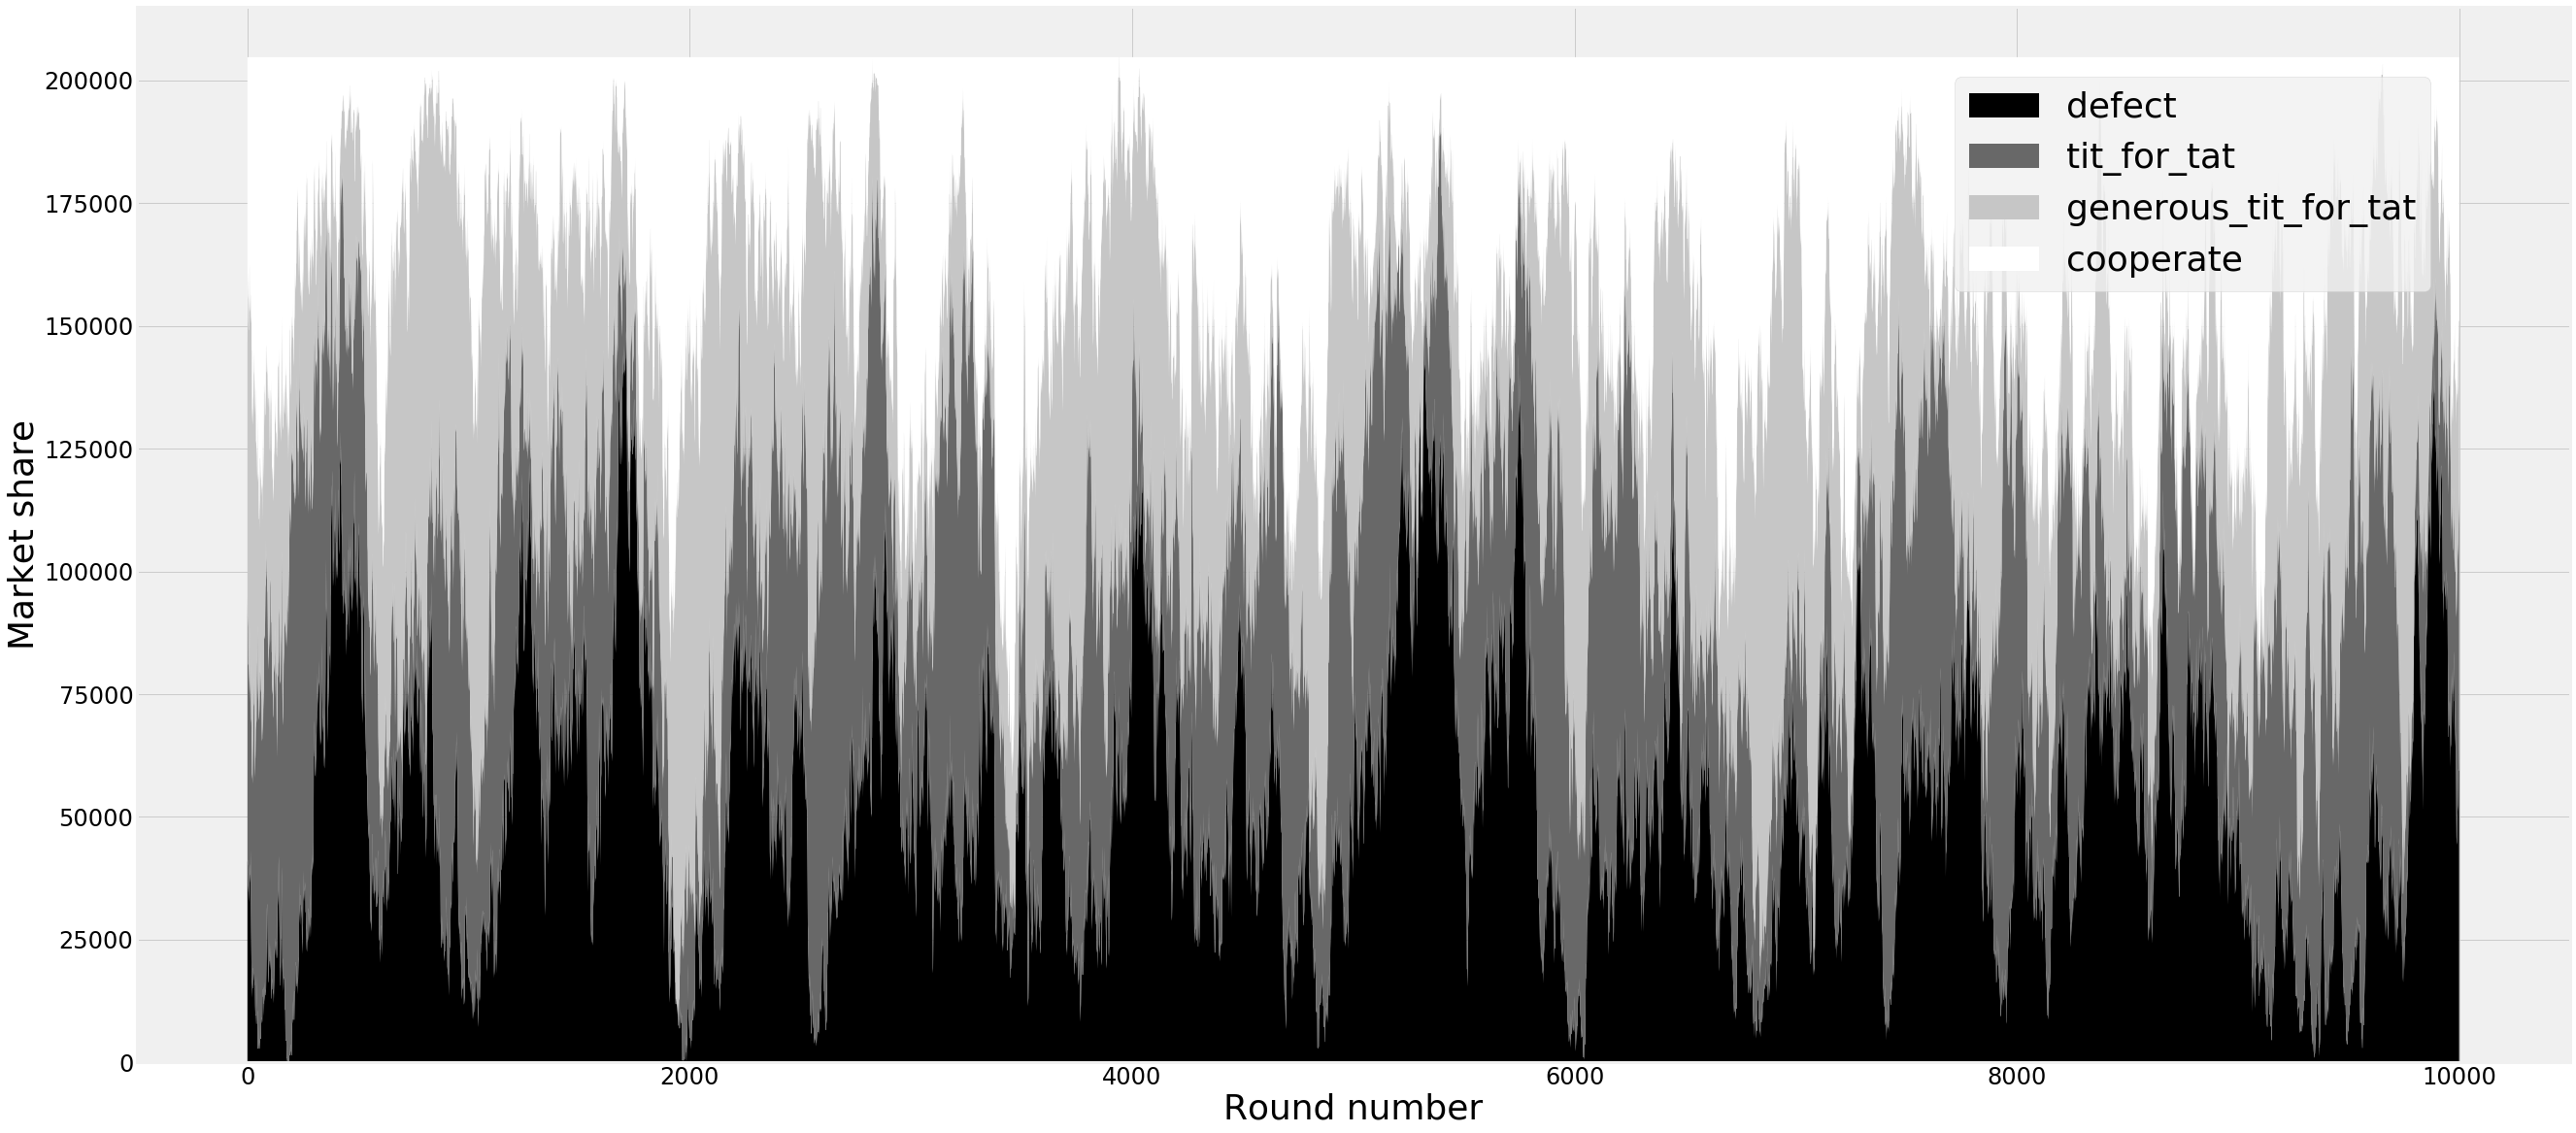

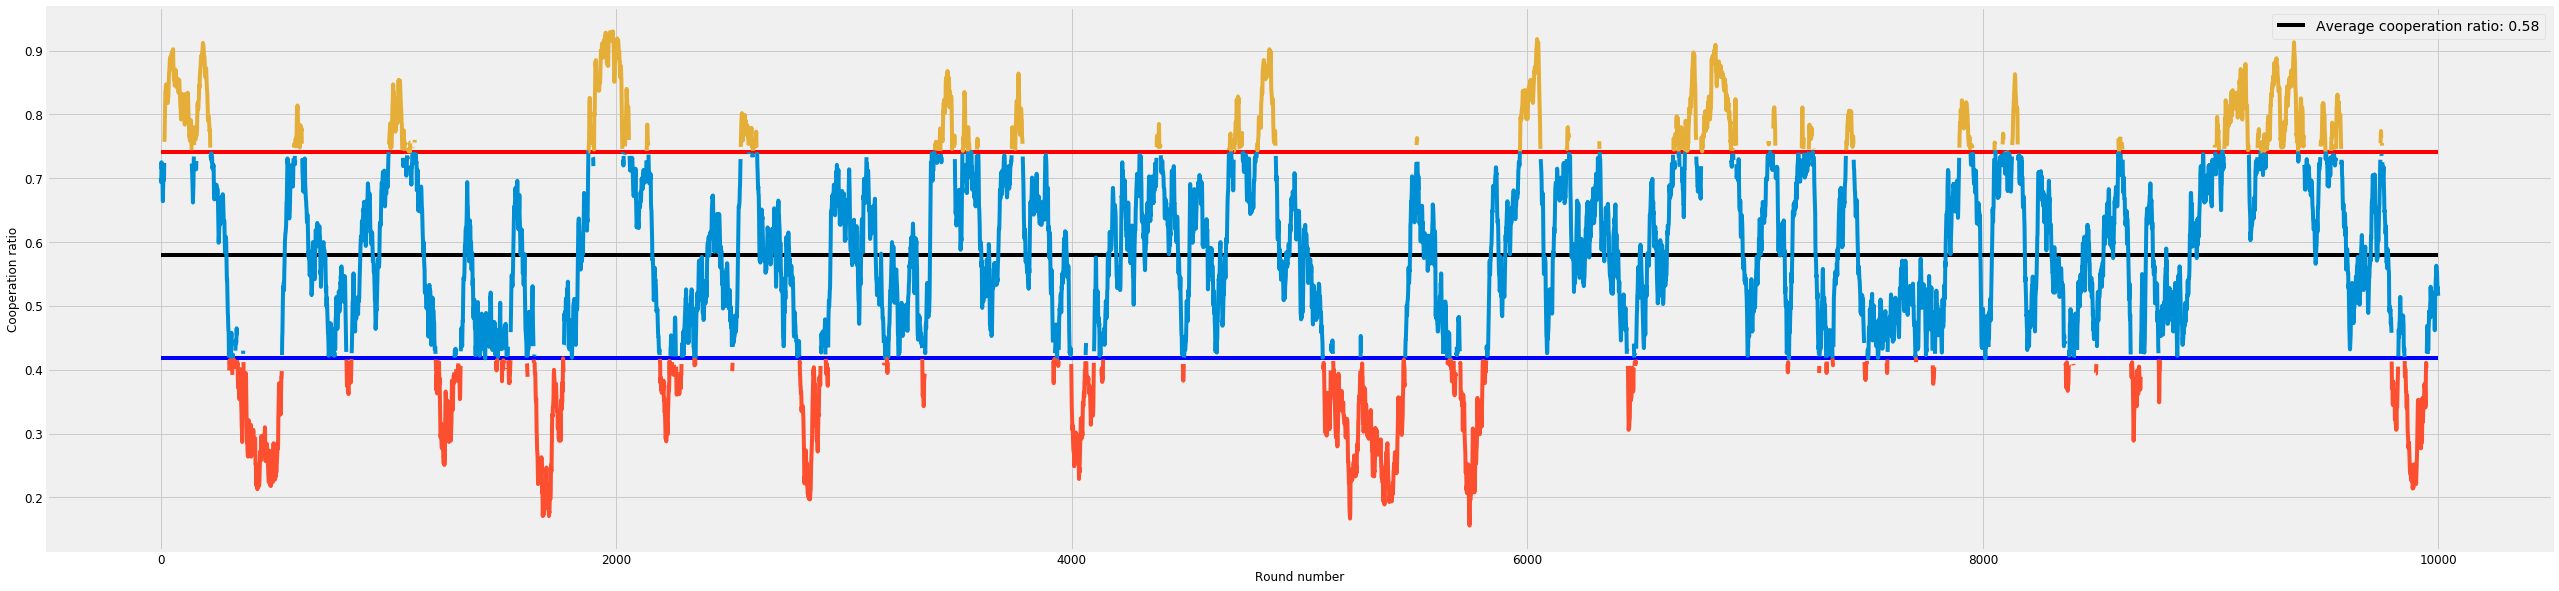

In [3]:
tour = Tournament.create_play_tournament(
                 agents = agents, 
                 max_rounds = 10000, 
                 strategy_list = [defect, tit_for_tat, generous_tit_for_tat, cooperate], 
                 payoff_functions = default_payoff_functions, 
                 surveillance_penalty = True,
                 self_reward = selfreward, #default function
                 playing_each_other = True,
                 nr_strategy_changes = 10,
                 mutation_rate = 0.1,
                 init_fitnes_as_m = False,
                 noise = 0.05,
                 )
draw_stack(tour)
C_D_ratios_per_round_var(tour, constant = 1)
outliers = count_outliers(tour, constants = np.arange(0.5, 3.1, 0.1))
data = {'S.D.': list(outliers.keys()), 'Counts': list(outliers.values()), 'Seed': str(seed)}
df = pd.DataFrame.from_dict(data)
print(df)
df.to_csv("Data/data_" + str(seed) + "_outliercounts.csv", encoding='utf-8', index = False, float_format='%.1f')
save_tournament_csv(tour, type_of_tournament= "_changing_sdm", seed = str(seed))